<a href="https://colab.research.google.com/github/Muhammad-Awais-Awan/TensorFLow-MachineLearning/blob/main/Cloth%20Identifier%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt





#Dataset
For this tutorial we will use the MINST Fashion Dataset. This is a dataset that is included in keras.
This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [18]:
fashion_mnist=keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data() #Split into testing and training

Let's have a look at this data to see what we are working with.

In [5]:
train_images.shape


(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total)

In [6]:
train_images[0,23,23] # lets have a look at one pixel

194

Our pixel value are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [7]:
train_labels[:10] # let's have a look at the first 10 training labels.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [8]:
class_names=["T-shirt/top",'Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

Finally, lets look at what some of these images look like!

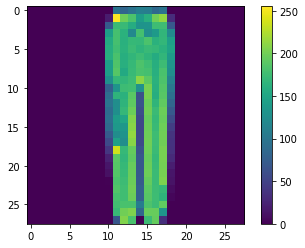

In [9]:
plt.figure() # make a figure
plt.imshow(train_images[1000]) # getting the image
plt.colorbar() # adding colorbar on the side
plt.grid(False) # dont want grid
plt.show() #showing the image


#Data Preprocessing
THe last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it to the model. In this case we will simply scale all of our greyscale pixel values(0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [19]:
train_images=train_images/255.0
test_images=test_images/255.0

#Building the Model

Now it's time to build the model! We are going to use keras sequential model with three different layers. This model represents a feed-forward neural network(one that passes values from left to right). We'll break down each layer and it's architecture below.

In [12]:
model= keras.Sequential([ #Sequential is one of the most simplest form of neural network, in which just information going from left to right,passing through the layers sequentially
    #inside here we are defining the no. of neurons for input layers for neural network
    keras.layers.Flatten(input_shape=(28,28)), #input layer(1) : (Flatten) allow us to take in a shape of 28 of 28, and flatten all the pixels into 784 pixels. We took the 28x28 matrix and flatten it out.
    
    #Dense means every neuron of previous layer is connected to every neuron of this layer
    #we have 128 neurons in next layer "not have a answer why there are 128 neurons here"
    keras.layers.Dense(128,activation='relu'), #hidden layer(2) : Activation Function(relu) Rectifier Linear Unit if input +ve it output 1 and if input -ve it output 0.
    
    #Dense layer with 10 output neurons with activation function of "softmax"
    # we have 10 neurons because we have total 10 classes to predict different values
    keras.layers.Dense(10,activation='softmax') #output layer(3) Activation Function(softmax) will make sure that all of values of our neurons add up to one, and that  they are b/w 0 and 1.
])

#Compiling the Model(part of model building)
The last step in building the model is to define the loss function, optimizer and meterics we would like to track. I won't go into detail about why we choose each of these right now.

In [14]:
# This step and above step is called "HYPER PARAMETER TRAINING". these are all the parameters that we can change.

model.compile(optimizer='adam', #adam is algorithm that performs the gradient descent
              loss='sparse_categorical_crossentropy',# loss function
              metrics=['accuracy'])# the output we want to see

#Training the model
 Now its finaly time to train the model. Since we've already done all the work on our data this step is as easy as calling a single methode.
This gives us a accuracy on training data

In [15]:
model.fit(train_images,train_labels,epochs=10) #we pass the data, labels and epochs and watch the magic

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5036 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3745 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3352 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3149 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2808 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2588 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2482 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.241

#Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin methode from keras.

The verbose argument is defined from the keras documentation as "verbose:0 or 1. Verbosity mode.0=silent, 1=progress bar."

In [20]:
test_loss, test_acc= model.evaluate(test_images,test_labels,verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8823
Test accuracy: 0.8823000192642212
